## BUILDING A MODEL TO PREDICT 'audience_rating'

### IMPORTING NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')
data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


### BASIC CHECKS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [4]:
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [5]:
data.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [6]:
data.describe(include='O')

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,studio_name,tomatometer_status
count,16638,16614,8309,16638,16621,16524,15289,16354,16222,16638
unique,16106,16613,8307,8,1080,8314,12121,16326,2886,3
top,Home,An adaptation of the Broadway drama about Prin...,"Extinction has a few intriguing ideas, but the...",R,Drama,Alfred Hitchcock,Woody Allen,Chris Rock,Paramount Pictures,Rotten
freq,5,2,2,6136,1727,36,33,4,497,7233


### DATA VISUALIZATION

In [7]:
# replaces instances of 'PG-13)' with 'PG-13' and 'R)' with 'R' within the 'rating' column of the DataFrame.  
data['rating'] = data['rating'].replace({'PG-13)': 'PG-13', 'R)': 'R'})

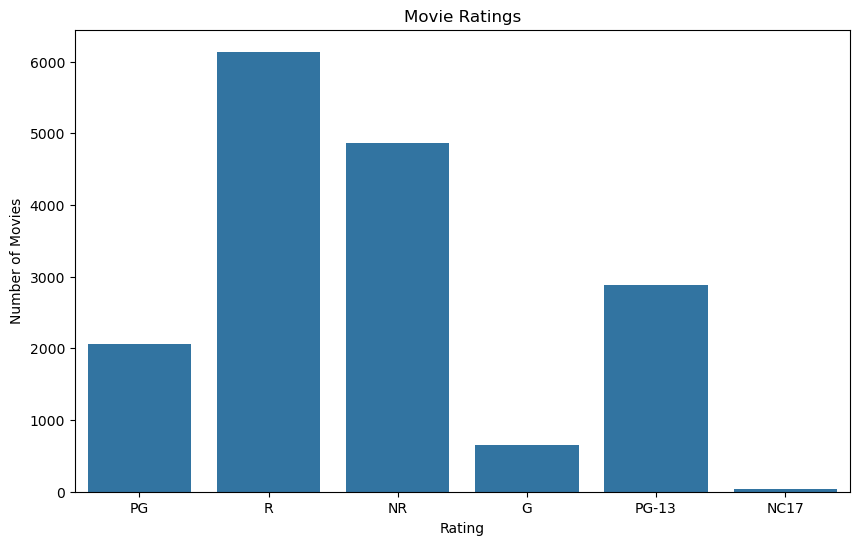

In [8]:
# COUNT PLOT FOR MOVIE RATINGS
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=data)
plt.title('Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

-> R rated movies has the highest no of movies with the count of above 6000

-> NR rated movie has the 2nd highest no of movie with the count of 5000

-> NC-17 rated movie has the lowest no of movies among others with the count less than 500

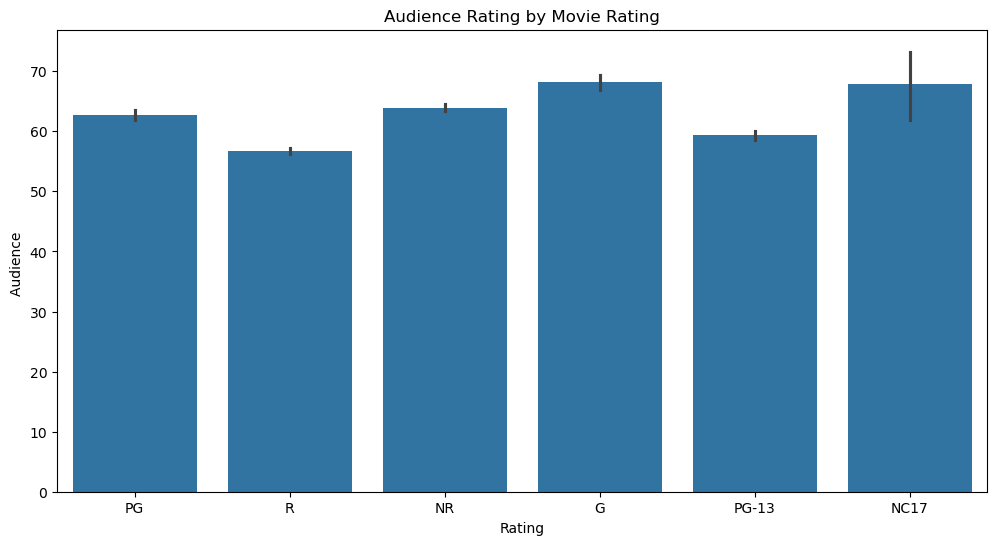

In [9]:
# BARPLOT OF AUDIENCE RATING BY MOVIE RATING
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='audience_rating', data=data)
plt.title('Audience Rating by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience ')
plt.show()

-> audience has rated above 68.0 for G and NC-17 rated movie

-> audience has rated 55.0 for R rated movies

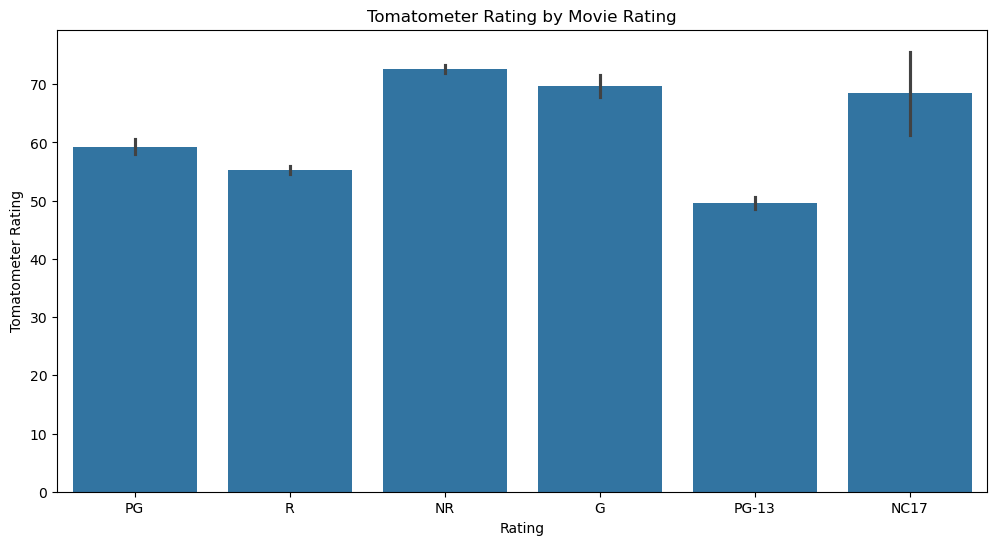

In [10]:
# BARPLOT OF TOMATOMETER RATING BY MOVIE RATING
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='tomatometer_rating', data=data)
plt.title('Tomatometer Rating by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Tomatometer Rating')
plt.show()

-> NR rated movie has rated highest with 70.0 by tomatometer 

-> PG-13 rated movie has rated lowest with 50.0 by tomatometer

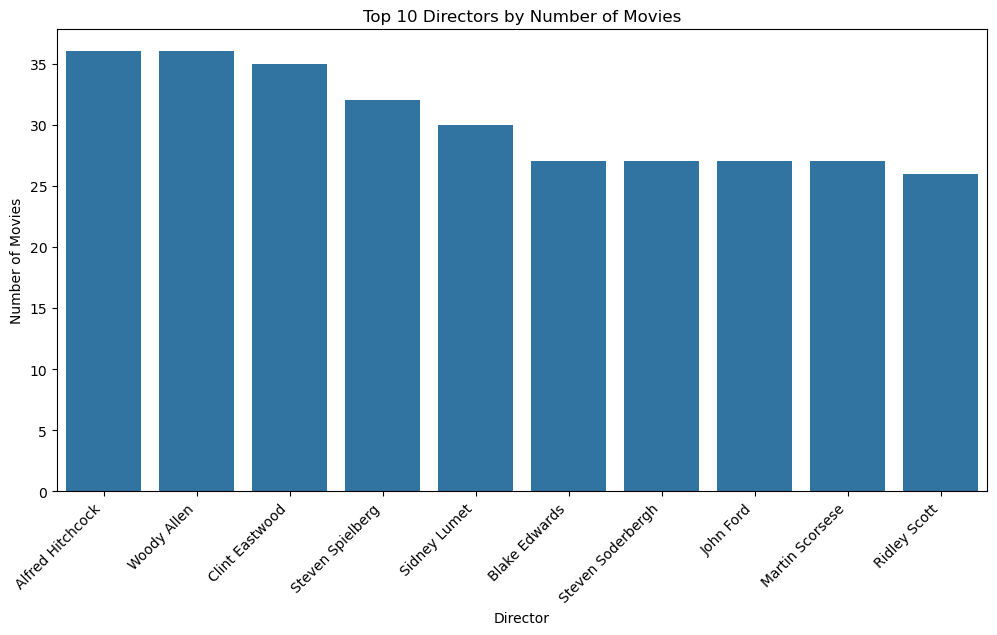

In [11]:
# COUNT PLOT FOR TOP 10 DIRECTORS
plt.figure(figsize=(12, 6))
director_counts = data['directors'].value_counts().nlargest(10)
sns.countplot(x='directors', data=data, order=director_counts.index)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.show()

-> Alfred Hitchcock and Woody Allen has directed more than 35 movies who are top 2 directors among all

-> Ridley Scott has directed 25 movies who is in the 10th position of among all directors

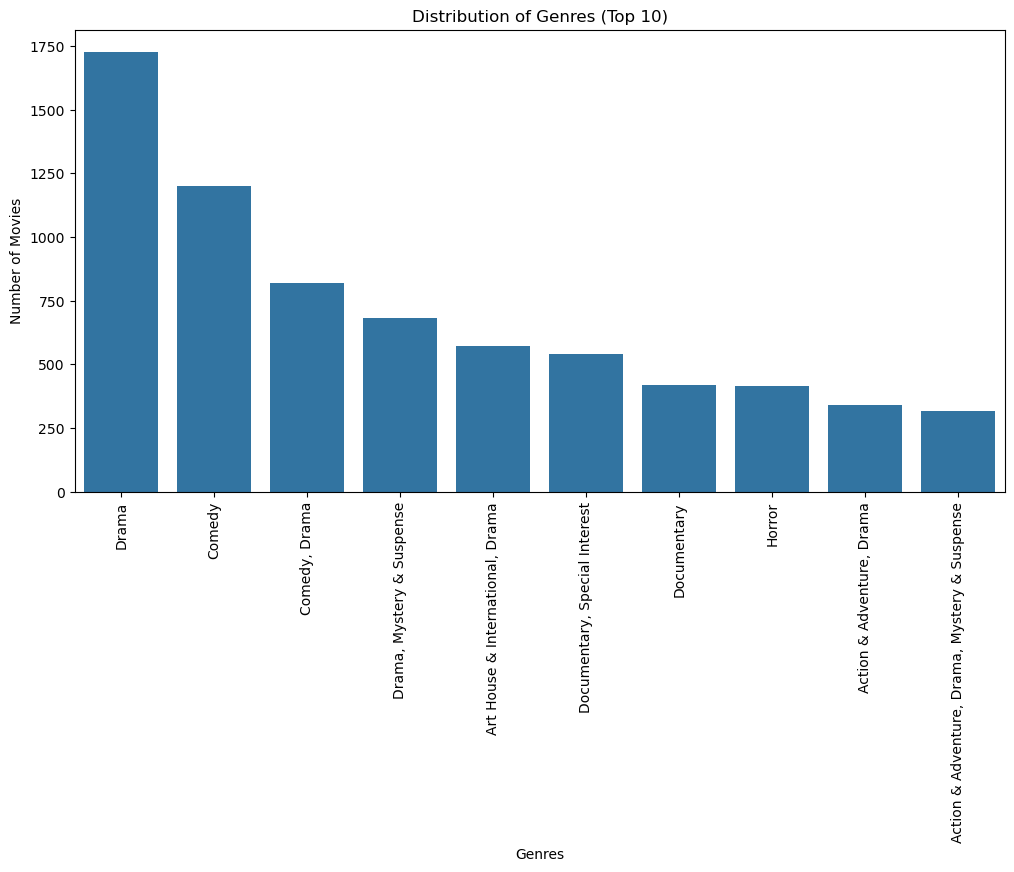

In [12]:
# BAR PLOT OF TOP 10 GENRES
plt.figure(figsize=(12, 6))
genre_counts = data['genre'].value_counts().nlargest(10) # Get counts for the top 20 genres
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Genres (Top 10)')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

-> 1700 Movies produced by directors are in the genre of Drama which is the top 1 

-> action and adventure movies are less produced by directors over the period

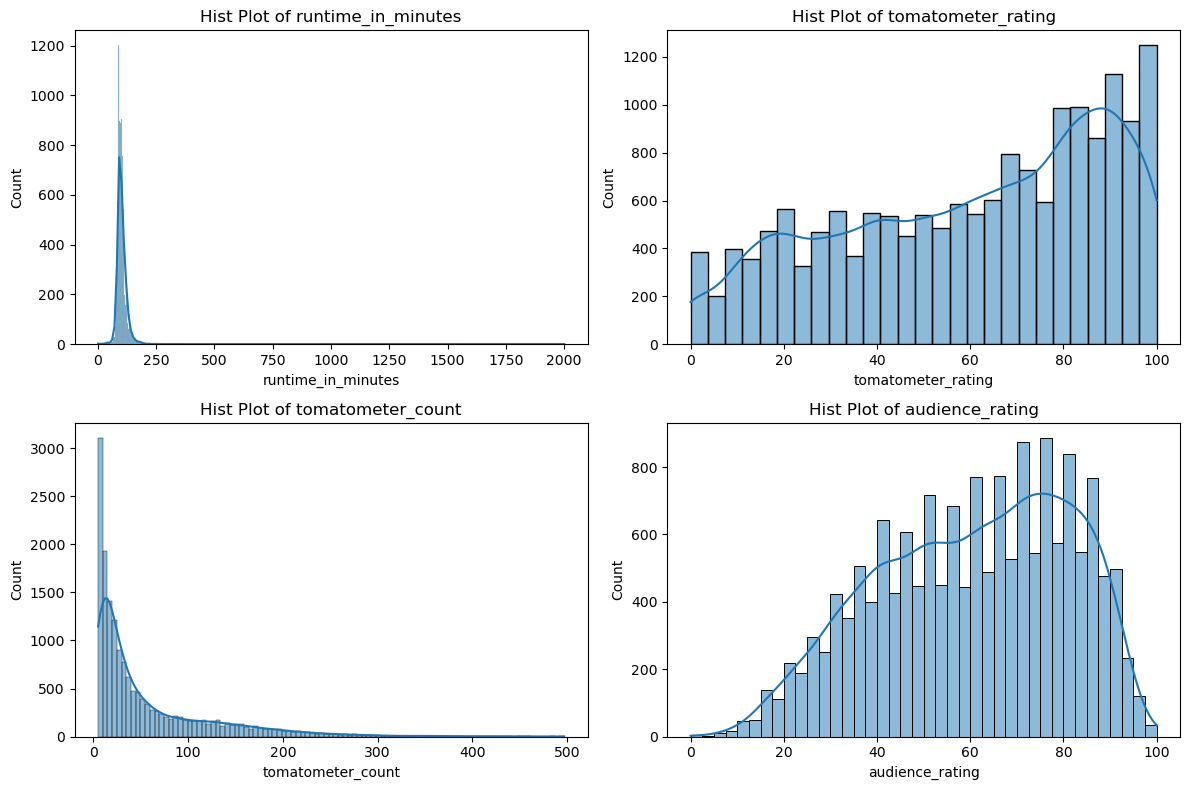

In [13]:
# HIST PLOT FOR NUMERICAL COLUMNS
num_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])][:4]
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=data[col],kde=True)
    plt.title(f'Hist Plot of {col}')

plt.tight_layout()
plt.show()

-> run time of every movie is exist between 0-250 mins  and aprox every movie's runtime is 150 mins

-> tomatometer rating increases linearly

-> tomatometer count has been left skewed with highest count of 3000 and average of 1500 and decreases drastically

-> most of highest audience ratings exist between 40 to 85 

### DATA PREPROCESSING

#### FILLING NULL VALUES

In [14]:
# null values are filled with mode value using fillna
for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mode()[0])

-> Filling null values with the mode (most frequent value) preserves the distribution of the categorical feature.  Other methods might introduce artificial values that don't reflect the true data.

-> For categorical data, replacing missing values with the mode introduces the least amount of distortion to the overall dataset compared to arbitrary values or mean/median which are not applicable.


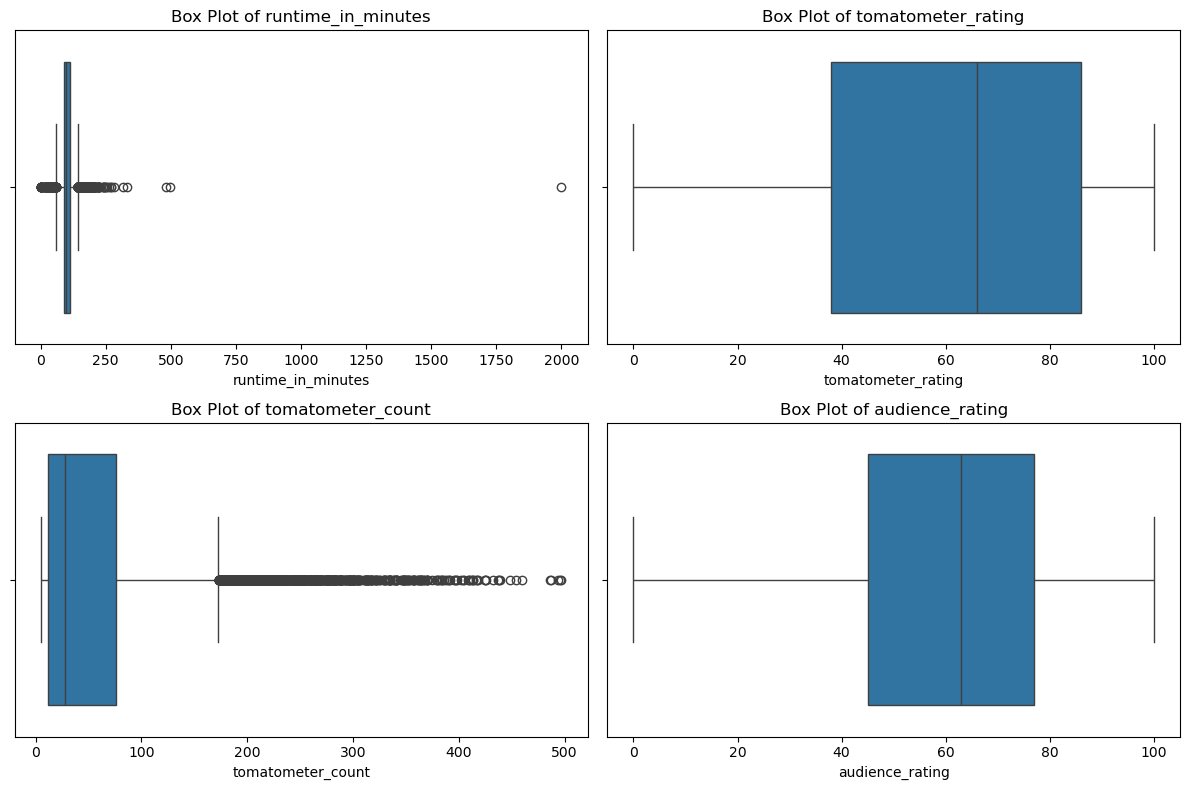

In [15]:
# BOX PLOT FOR NUMERICAL COLUMNS
num_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])][:4]
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

#### REMOVING OUTLIERS

In [16]:
# OUTLIERS ARE REVOMED USING IQR 
def remove_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return df_filtered

# Removing outliers for 'tomatometer_count'
data = remove_outliers_iqr(data, 'tomatometer_count')

# Removing outliers for 'runtime_in_minutes'
data = remove_outliers_iqr(data, 'runtime_in_minutes')


-> These outlier values were removed, and the resulting missing values in each column were imputed using the mean of that column.

-> This approach helps to mitigate the influence of extreme values on subsequent analyses and modeling, while preserving data integrity.

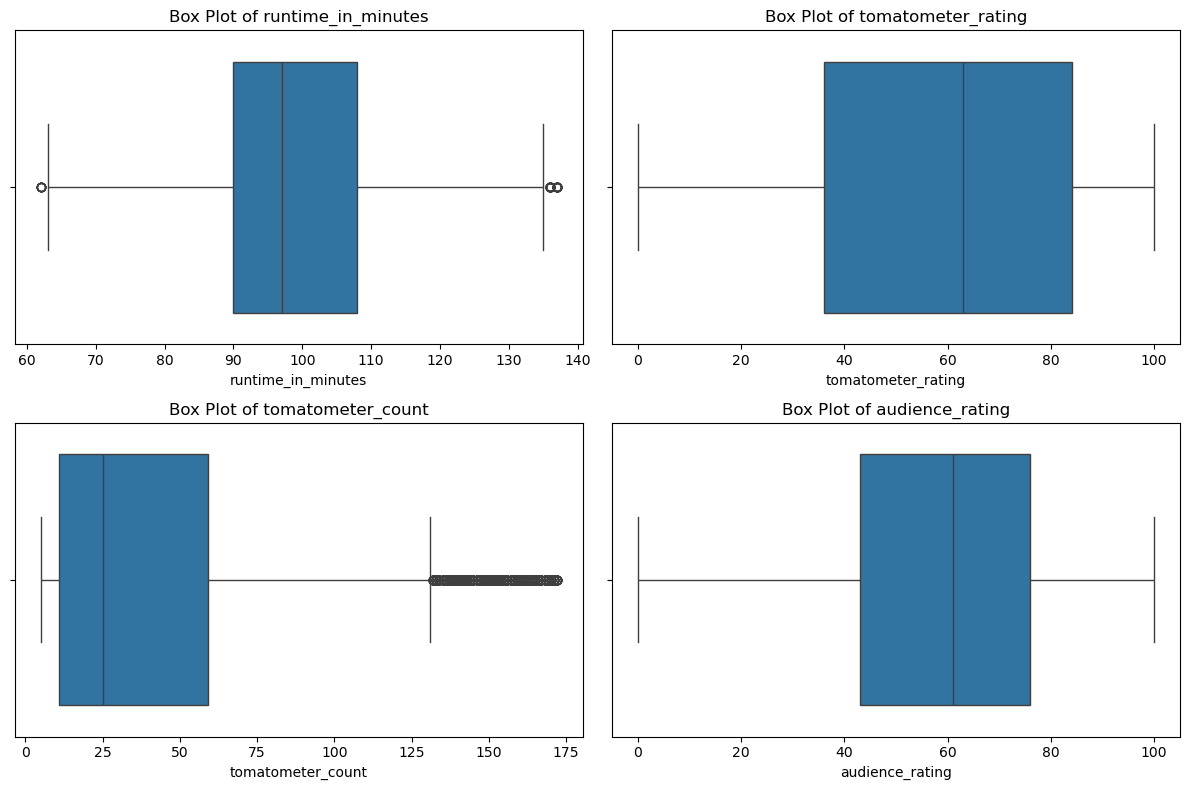

In [17]:
# BOX PLOT AFTER REMOVING OUTLIERS
num_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])][:4]
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

#### CONVERTING CATEGORICAL TO NUMERICAL USING MAP FUNCTION

In [18]:
data.rating=data.rating.map({'PG':1, 'R':2, 'NR':3, 'G':4, 'PG-13':5, 'NC17':6})
data.rating.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [19]:
data.tomatometer_status=data.tomatometer_status.map({'Rotten':1, 'Certified Fresh':2, 'Fresh':3})
data.tomatometer_status.unique()

array([1, 2, 3], dtype=int64)

#### CONVERTING CATEGORICAL TO NUMERICAL USING LABEL ENCODER

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['genre'] = le.fit_transform(data['genre'])

#### DROPING  UNWANTED COLUMNS

In [21]:
data.drop(columns=['movie_title', 'movie_info','studio_name', 'critics_consensus','directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date'],axis=1,inplace=True)

-> The column has only one unique value in 99% of the dataset so it is not useful to predict the output.

-> movie's title is unlikely to predict its audience rating, so this kind of identifier would likely be unhelpful and could be removed.

#### CORRELATION MATRIX

In [22]:
cor=data.corr()
cor

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
rating,1.000000,0.015797,-0.015643,-0.016745,-0.033663,0.085893,0.026618
genre,0.015797,1.000000,-0.063456,0.003143,0.017855,0.004015,-0.018329
runtime_in_minutes,-0.015643,-0.063456,1.000000,-0.013659,0.041183,0.187497,0.164028
tomatometer_status,-0.016745,0.003143,-0.013659,1.000000,0.783678,-0.172700,0.483005
tomatometer_rating,-0.033663,0.017855,0.041183,0.783678,1.000000,-0.003870,0.646108
tomatometer_count,0.085893,0.004015,0.187497,-0.172700,-0.003870,1.000000,0.069585
audience_rating,0.026618,-0.018329,0.164028,0.483005,0.646108,0.069585,1.000000


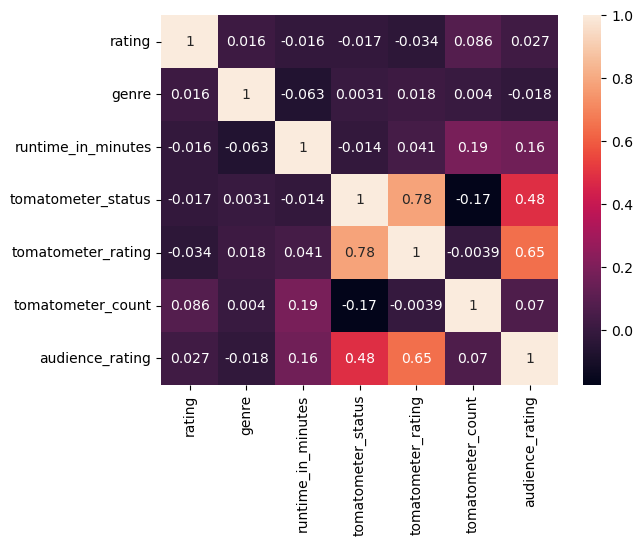

In [23]:
sns.heatmap(cor,annot=True)
plt.show()

-> Strong positive correlation between tomatometer_rating and audience_rating, suggesting movies well-received by critics tend to be liked by audiences.

-> Moderate positive correlation between tomatometer_rating and tomatometer_count, indicating higher ratings often come with more reviews.

-> runtime_in_minutes shows weak correlations with other features, implying movie length doesn't strongly influence ratings or review counts.

-> rating has weak to moderate correlations, implying that the movie rating system  have some influence.


In [24]:
data.drop(columns=['genre'],axis=1,inplace=True)

#### SCALING THE DATA

In [25]:
from sklearn.preprocessing import StandardScaler
# columns to scaling
cols_to_scale = ['rating',  'runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count']

# Creating a StandardScaler object
scaler = StandardScaler()

# Fiting and transforming the selected columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


#### SAVING DATA AS PREPROCESSED DATA

In [26]:
data.to_csv('Preprocessed_data.csv')
preprocessed_data=pd.read_csv('Preprocessed_data.csv')
preprocessed_data

,Unnamed: 0,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,0,-1.421853,-1.192052,-1.019767,-0.344754,2.393944,53.0
1,1,-0.603430,-0.678389,0.062706,0.933707,2.299490,64.0
2,2,-0.603430,1.376264,1.145179,0.311753,-0.486911,53.0
3,3,0.214992,-0.311486,0.062706,1.417449,0.197883,97.0
4,4,1.033415,2.036688,1.145179,1.037366,-0.368843,74.0
...,...,...,...,...,...,...,...
14651,16629,-1.421853,0.128796,-1.019767,-1.554110,2.086968,41.0
14652,16630,1.851838,0.422318,1.145179,0.173541,2.228649,80.0
14653,16632,-1.421853,-0.825150,-1.019767,-1.934193,0.552086,33.0
14654,16633,-0.603430,0.348938,-1.019767,-0.102883,-0.793887,74.0


### MODEL CREATION

#### 1) LINEAR REGRESSION

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = preprocessed_data.drop('audience_rating', axis=1)
y = preprocessed_data['audience_rating']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train a linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Making predictions on the test set
y_predict = LR.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 236.85784557315662
R-squared: 0.4477718155218503


In [28]:
LR_accuracy = mean_squared_error(y_test, y_predict) 
print(f"LR_accuracy: {LR_accuracy}")

LR_accuracy: 236.85784557315662


#### 2) SUPPORT VECTOR MACHINE

In [29]:
from sklearn.svm import SVR
X = preprocessed_data.drop('audience_rating', axis=1)
y = preprocessed_data['audience_rating']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train an SVR model
SVM = SVR() 
SVM.fit(X_train, y_train)

# Making predictions on the test set
y_predict = SVM.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 434.4347330166502
R-squared: -0.0128737906380052


In [30]:
SVR_accuracy = mean_squared_error(y_test, y_predict) # Use a different variable name
print(f"SVR_accuracy: {SVR_accuracy}")

SVR_accuracy: 434.4347330166502


#### 3) DECISION TREE

In [31]:
from sklearn.tree import DecisionTreeRegressor
X = preprocessed_data.drop('audience_rating', axis=1)
y = preprocessed_data['audience_rating']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train a Decision Tree Regression model
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, y_train)

# Making predictions on the test set
y_predict = DT.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 468.2581855388813
R-squared: -0.09173233017228277


In [32]:
DT_accuracy = mean_squared_error(y_test, y_predict) # Use a different variable name
print(f"DT_accuracy: {DT_accuracy}")

DT_accuracy: 468.2581855388813


#### 4) RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestRegressor
X = preprocessed_data.drop('audience_rating', axis=1)
y = preprocessed_data['audience_rating']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train a Random Forest Regression model
RF = RandomForestRegressor(random_state=42, n_estimators=100)
RF.fit(X_train, y_train)

# Making predictions on the test set
y_predict = RF.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 244.904405627558
R-squared: 0.42901146059510575


In [34]:
RF_accuracy = mean_squared_error(y_test, y_predict) # Use a different variable name
print(f"DT_accuracy: {RF_accuracy}")

DT_accuracy: 244.904405627558


### COMPARISON MATRIX

In [35]:
models = pd.DataFrame([LR_accuracy,SVR_accuracy,DT_accuracy,RF_accuracy],
             index=['Logistic Regression','SVM','DT','Random Forest'],columns=['accuracy'])

models.sort_values('accuracy', ascending=True)


,accuracy
Logistic Regression,236.857846
Random Forest,244.904406
SVM,434.434733
DT,468.258186


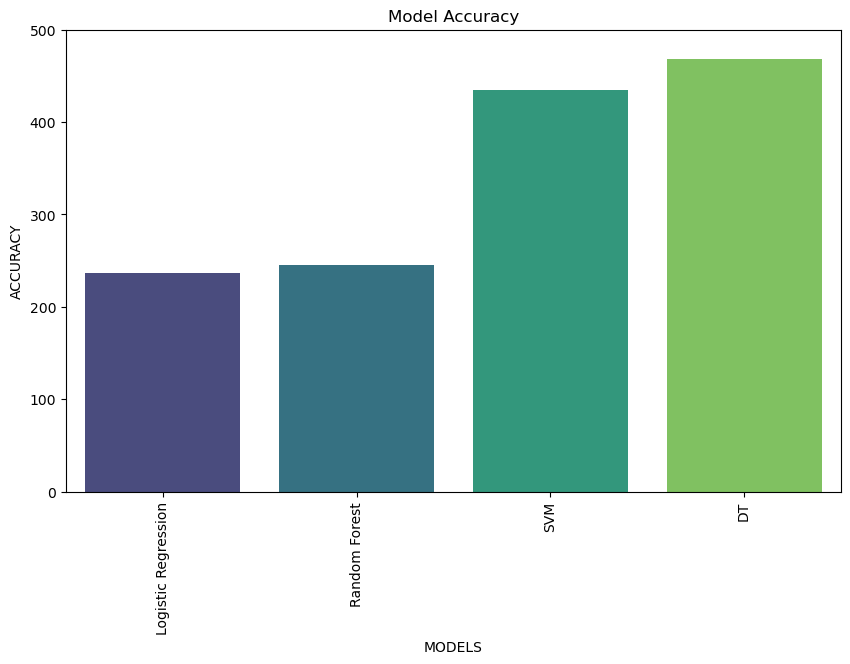

In [36]:
plt.figure(figsize=(10, 6))
models.accuracy.sort_values(ascending=True).values
sns.barplot(x = models.accuracy.sort_values(ascending=True).index, 
            y = models.accuracy.sort_values(ascending=True).values,palette='viridis')
plt.title('Model Accuracy')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.xticks(rotation=90)
plt.ylim(0, 500)  
plt.show()

I considered Mean Squared Error (MSE) because it quantifies the average squared difference between predicted and actual values, making it an effective metric to evaluate and compare the prediction accuracy of models for audience ratings. It highlights how close the predictions are to the actual values,'Linear Regression' and 'Random Forest' with lower MSE indicating better performance.